<a href="https://colab.research.google.com/github/Eya-Dhif/Text-Mining/blob/main/TextMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
#cela suppose un élément json par ligne dans le fichier json
df=pd.read_json("News_Category_Dataset_v3.json.zip", lines=True)

In [ ]:
df.dtypes


link                         object
headline                     object
category                     object
short_description            object
authors                      object
date                 datetime64[ns]
dtype: object

In [ ]:
#nombre de lignes (points de données)
len(df)

209527

In [ ]:
# Prenez un échantillon de 3 pour afficher les données
df.sample(3)


,link,headline,category,short_description,authors,date
40007,https://www.huffingtonpost.com/entry/trump-bud...,Donald Trump's Budget Could Cost Money Where I...,POLITICS,Cuts to worker safety are a prime example. Nee...,Dave Jamieson,2017-03-21
98510,https://www.huffingtonpost.com/entry/is-a-deat...,Is a Death Sentence Really a Death Sentence?,POLITICS,As we struggle to delineate the upper limits o...,"Amanda Glassman, ContributorScreenwriter",2015-05-28
195564,https://www.huffingtonpost.com/entry/casa-addi...,Addiction: America's Most Neglected Disease,WELLNESS,The National Center on Addiction and Substance...,"Lloyd I. Sederer, MD, Contributor\nChief Medic...",2012-06-26


<AxesSubplot:>

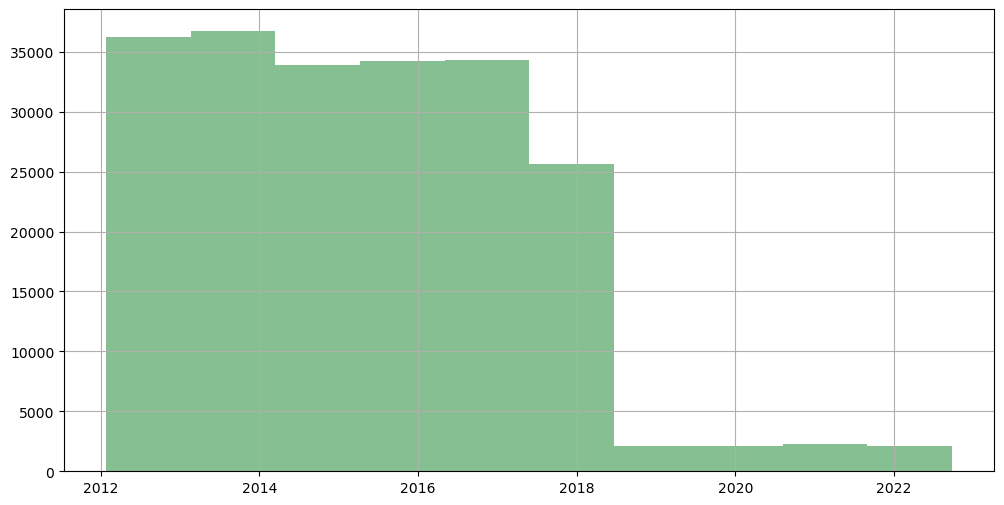

In [ ]:
df.date.hist(figsize=(12,6),color='#86bf91',)

In [ ]:
<matplotlib.axes._subplots.AxesSubplot at 0x1a695a80508>

SyntaxError: invalid syntax (701545154.py, line 1)

In [ ]:
<matplotlib.axes._subplots.AxesSubplot at 0x1a695a80508>

In [ ]:
len(set(df['category'].values))

42

<AxesSubplot:>

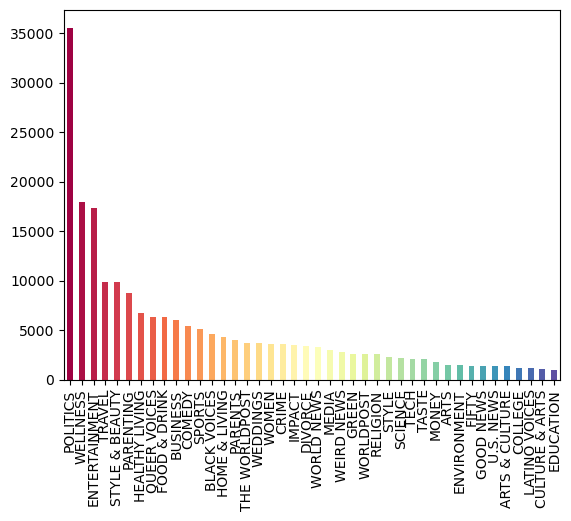

In [ ]:
import matplotlib
import numpy as np
cmap = matplotlib.cm.get_cmap('Spectral')
rgba = [cmap(i) for i in np.linspace(0,1,len(set(df['category'].values)))]
df['category'].value_counts().plot(kind='bar',color =rgba)

In [ ]:
<matplotlib.axes._subplots.AxesSubplot at 0x1a6942753c8>

SyntaxError: invalid syntax (4152538568.py, line 1)

(8962, 6)


<AxesSubplot:>

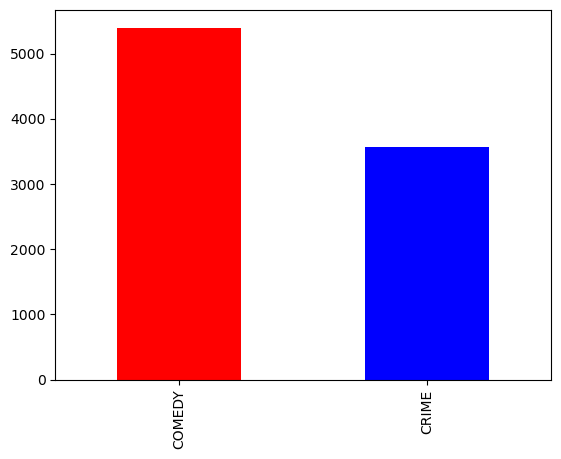

In [ ]:
df_orig=df.copy()
df = df_orig[df_orig['category'].isin(['CRIME','COMEDY'])]
print(df.shape)
df.head()
df = df.loc[:, ['headline','category']]
df['category'].value_counts().plot(kind='bar',color =['r','b'])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
sample_doc = ["Hello I am a boy", "Hello I am a student", "My name is Jill"]
cv=CountVectorizer(max_df=0.85)
word_count_vector=cv.fit_transform(sample_doc)
word_count_vector_arr = word_count_vector.toarray()
pd.DataFrame(word_count_vector_arr,columns=sorted(cv.vocabulary_, key=cv.vocabulary_.get))

,am,boy,hello,is,jill,my,name,student
0,1,1,1,0,0,0,0,0
1,1,0,1,0,0,0,0,1
2,0,0,0,1,1,1,1,0


In [ ]:
pd.DataFrame(word_count_vector_arr,columns=cv.vocabulary_)

,hello,am,boy,student,my,name,is,jill
0,1,1,1,0,0,0,0,0
1,1,0,1,0,0,0,0,1
2,0,0,0,1,1,1,1,0


In [ ]:
cv.vocabulary_

{'hello': 2,
 'am': 0,
 'boy': 1,
 'student': 7,
 'my': 5,
 'name': 6,
 'is': 3,
 'jill': 4}

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
docs=df['headline'].tolist()
# créer un vocabulaire de mots,
# ignorer les mots qui apparaissent dans 85% des documents,
# éliminer les mots vides
cv=CountVectorizer(max_df=0.95)
word_count_vector=cv.fit_transform(docs)
list(cv.vocabulary_.keys())[:10]

['23',
 'of',
 'the',
 'funniest',
 'tweets',
 'about',
 'cats',
 'and',
 'dogs',
 'this']

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
df['category_is_crime'] = df['category']=='CRIME'
X_train, X_test, y_train, y_test = train_test_split(word_count_vector, df['category_is_crime'], test_size=0.2, random_state=42)

In [ ]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
print(cm)
acc=(cm[0,0]+cm[1,1])/sum(sum(cm))
print('Accuracy of a simple linear model with CountVectorizer is .... {:.2f}%'.format(acc*100))

[[1056   22]
 [  71  644]]
Accuracy of a simple linear model with CountVectorizer is .... 94.81%


In [ ]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_x_train = tfidf_transformer.fit_transform(X_train)
model1 = LogisticRegression()
model1.fit(tfidf_x_train, y_train)
tfidf_x_test = tfidf_transformer.transform(X_test)
y_pred = model1.predict(tfidf_x_test)
cm=confusion_matrix(y_test, y_pred)
print(cm)
acc=(cm[0,0]+cm[1,1])/sum(sum(cm))
print('Accuracy of a simple linear model with TFIDF is .... {:.2f}%'.format(acc*100))

[[1058   20]
 [  85  630]]
Accuracy of a simple linear model with TFIDF is .... 94.14%


In [ ]:
## Extraction de mots clés importants à l'aide de tfidf
print(df.iloc[1].headline)
vector = cv.transform([df.iloc[1].headline])
tfidf_vector = tfidf_transformer.transform(vector)
coo_matrix = tfidf_vector.tocoo()
tuples = zip(coo_matrix.col, coo_matrix.data)
sorted_tuple = sorted(tuples, key=lambda x: (x[1], x[0]),reverse=True)
[(cv.get_feature_names()[i[0]],i[1]) for i in sorted_tuple]

In [ ]:
## Extraction de mots clés importants à l'aide de tfidf
print(df.iloc[5].headline)
vector = cv.transform([df.iloc[5].headline])
tfidf_vector = tfidf_transformer.transform(vector)
coo_matrix = tfidf_vector.tocoo()
tuples = zip(coo_matrix.col, coo_matrix.data)
sorted_tuple = sorted(tuples, key=lambda x: (x[1], x[0]),reverse=True)
[(cv.get_feature_names()[i[0]],i[1]) for i in sorted_tuple]

Albuquerque Police Tell Muslim Community To Be 'Vigilant' Amid Series Of Murders


[('vigilant', 0.3992356921271654),
 ('albuquerque', 0.3594060425271903),
 ('community', 0.3514808246143428),
 ('series', 0.32927607573548756),
 ('murders', 0.32927607573548756),
 ('amid', 0.3251330991311599),
 ('tell', 0.29307088740266046),
 ('muslim', 0.28009588860733536),
 ('be', 0.20902873832454155),
 ('police', 0.16991576773346884),
 ('of', 0.12006301847188751),
 ('to', 0.11840028111727706)]

In [ ]:
comedy_1 = df[~df['category_is_crime']].iloc[0].headline
print(comedy_1)

23 Of The Funniest Tweets About Cats And Dogs This Week (Sept. 17-23)


In [ ]:
## Extraction de mots clés importants à l'aide de tfidf
vector = cv.transform([comedy_1])
tfidf_vector = tfidf_transformer.transform(vector)
coo_matrix = tfidf_vector.tocoo()
tuples = zip(coo_matrix.col, coo_matrix.data)
sorted_tuple = sorted(tuples, key=lambda x: (x[1], x[0]),reverse=True)
[(cv.get_feature_names()[i[0]],i[1]) for i in sorted_tuple]

[('23', 0.6262531841479153),
 ('sept', 0.39662365860152876),
 ('17', 0.2725071724226913),
 ('cats', 0.2527324680055349),
 ('dogs', 0.24035305813916352),
 ('funniest', 0.23874669988443742),
 ('tweets', 0.23155726859084944),
 ('week', 0.204388624081469),
 ('about', 0.1784401518622229),
 ('this', 0.16881929825929912),
 ('and', 0.1385770035185798),
 ('of', 0.11090741110727972),
 ('the', 0.10175864984533016)]

In [ ]:
import requests
from bs4 import BeautifulSoup
page = requests.get("http://www.facebook.com")
soup = BeautifulSoup(page.content, "html.parser")
print(soup)

<!DOCTYPE html>

<html class="no_js" id="facebook" lang="fr">
<head><meta charset="utf-8"/><meta content="default" id="meta_referrer" name="referrer"/><script nonce="4Dxwn4rZ">function envFlush(a){function b(b){for(var c in a)b[c]=a[c]}window.requireLazy?window.requireLazy(["Env"],b):(window.Env=window.Env||{},b(window.Env))}envFlush({"useTrustedTypes":false,"isTrustedTypesReportOnly":false,"ajaxpipe_token":"AXiKFSjSh9we5dN279E","gk_instrument_object_url":true,"stack_trace_limit":30,"timesliceBufferSize":5000,"show_invariant_decoder":false,"compat_iframe_token":"AQ6586MdTpu4tdWXT8I","isCQuick":false});</script><script nonce="4Dxwn4rZ">(function(a){function b(b){if(!window.openDatabase)return;b.I_AM_INCOGNITO_AND_I_REALLY_NEED_WEBSQL=function(a,b,c,d){return window.openDatabase(a,b,c,d)};window.openDatabase=function(){throw new Error()}}b(a)})(this);</script><style nonce="4Dxwn4rZ"></style><script nonce="4Dxwn4rZ">__DEV__=0;</script><noscript><meta content="0; URL=/?_fb_noscript=1" http

In [ ]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
s0 = "This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <--"
tknzr.tokenize(s0)

['This',
 'is',
 'a',
 'cooool',
 '#dummysmiley',
 ':',
 ':-)',
 ':-P',
 '<3',
 'and',
 'some',
 'arrows',
 '<',
 '>',
 '->',
 '<--']

In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
sample_words = ["marketing", "markets", "marketed", "marketer"]
print("sample_words")
for each in (sample_words)
print("{s}->{s}".format(each, ps.stem(each)))

In [ ]:
import nltk
nltk.download()
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
wnl = WordNetLemmatizer()
print(wnl.lemmatize("beaten"))
print(wnl.lemmatize("beaten", "v"))
print(wnl.lemmatize("women", "n"))
print(wnl.lemmatize("happiest", "a"))

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download("tagsets")
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
s0 = "This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <--"
tokens=tknzr.tokenize(s0)
tagged = nltk.pos_tag(tokens)
print(tagged)

In [ ]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import names
nltk.download("names")
def gender_features(word):
return {'last_letter': word[-1]}
# Load data and training
names = ([(name, 'male') for name in names.words('male.txt')] +
[(name, 'female') for name in names.words('female.txt')])
#we will be using the last letter of each name as a feature for training the model
featuresets = [(gender_features(n), g) for (n, g) in names]
train_set = featuresets
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(names)
print("Anny")
print(classifier.classify(gender_features('Anny')))